# The pipeline for building Logistic Regression or Linear Classifier

1. Setting your goal and accuracy metric
    - I have set the goal Accuracy of the model but later change to F1-score due to skewness of the data.(only 24% of the data have positive examples)
2. Pre-process the data set
3. Build the mode in small parts
4. Integrate the Model
5. Train the Model
6. Test on Evaluation Metric
7. Predict on Test Data

## Importing Libraries

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

%matplotlib inline

## Importing Dataset

In [23]:
census = pd.read_csv("adult.data.csv")
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Preprocessing the Data 
### 2.1 Defining functions for preprocessing the data


This function takes the pandas data frame file and remove all the data that has ' ?' in any row. This is to clean the data

In [24]:
def clean_data(pd_data):
    '''
    This function takes the pandas data frame and remove the examples that have unknown values e.g ' ?'
    
    Arguments:
        pd_data -- pandas dataframe
    Return:
        pandas dataframe with removed examples that have missing values in any feature
    '''
    x = pd_data.where(pd_data == ' ?')
    x = x.dropna(thresh = 1)
    x = x.index.values
    return pd_data.drop(x)

 This function generate a dictionary for all the features that have string values. Those string values mapped into numbers

In [25]:
def map_string_features(pd_data):
    '''
    This function takes the pandas data frame and map the string values of feature to numeric value in a dictionary
    based on the number of classes in a feature column
    
    Arguments:
        pd_data -- pandas dataframe
        
    Return:
        feature mapped dictionary in the format
            {
                'feature_name': {'class_name': numeric_value}
            }
    '''
    catogries_dict = {}
    sub_cat = {}
    census_catogries  = pd_data.keys().drop(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])
    for catagories in census_catogries:
        x = pd_data[catagories].unique()
        for i in range(len(x)):
            sub_cat[x[i]] = i
        catogries_dict[catagories] = sub_cat
        sub_cat = {}
    return catogries_dict

### 2.2 Applying preprocessing to Data

In [26]:
clean_census = clean_data(census) # remove unknow values
feature_map = map_string_features(clean_census) # getting feature map dict
clean_census_numeric = clean_census.replace(feature_map) # converting data to numeric value based on feature_map dict

ccn = clean_census_numeric.copy() # creating a copy

output = ccn['income'] # get the oputput feature column
Y = np.reshape(output.values, (-1, 1)) # creating output label numpy array of shape (no.of examples, 1)

ccn = ccn.drop(['income'], axis = 1) # remove the output column from the data


mean_data = ccn.mean()
std_data = ccn.std()
max_data = ccn.max()
min_data = ccn.min()
X = ((ccn - mean_data)/std_data) # normalization of data

print("Data shape: " + str(X.shape))
print("Labels shape: " + str(Y.shape))
X.head()

Data shape: (30162, 14)
Labels shape: (30162, 1)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.042795,-2.256500,-1.062704,-0.984145,1.128900,-0.882966,-1.344798,-1.064240,-0.345855,-0.692795,0.146090,-0.218582,-0.077733,-0.239234
1,0.880274,-1.186736,-1.007855,-0.984145,1.128900,-0.061649,-1.053439,-0.365906,-0.345855,-0.692795,-0.147442,-0.218582,-2.331492,-0.239234
2,-0.033339,-0.116971,0.244689,-0.696771,-0.439731,0.759667,-0.762081,-1.064240,-0.345855,-0.692795,-0.147442,-0.218582,-0.077733,-0.239234
3,1.108677,-0.116971,0.425233,-0.409396,-1.224046,-0.061649,-0.762081,-0.365906,1.286901,-0.692795,-0.147442,-0.218582,-0.077733,-0.239234
4,-0.794684,-0.116971,1.406635,-0.984145,1.128900,-0.061649,-0.470722,0.332427,1.286901,1.443381,-0.147442,-0.218582,-0.077733,-0.037094


### 2.3 Splitting the data into Train and Evaluation

In [27]:
X_train, X_eval, y_train, y_eval = train_test_split(X, Y, test_size=0.25, random_state=50)
print("Train Data shape: " + str(X_train.shape))
print("Train Labels shape: " + str(y_train.shape))
print("Evaluation Data shape: " + str(X_eval.shape))
print("Evaluation Labels shape: " + str(y_eval.shape))

Train Data shape: (22621, 14)
Train Labels shape: (22621, 1)
Evaluation Data shape: (7541, 14)
Evaluation Labels shape: (7541, 1)


Since the ALgorithm takes input in the shape (number of features, number of examples) we transpose the data to make it in that form

In [28]:
X_train = X_train.T
X_eval = X_eval.T
y_train = y_train.T
y_eval = y_eval.T
print("Train Data shape: " + str(X_train.shape))
print("Train Labels shape: " + str(y_train.shape))
print("Evaluation Data shape: " + str(X_eval.shape))
print("Evaluation Labels shape: " + str(y_eval.shape))

Train Data shape: (14, 22621)
Train Labels shape: (1, 22621)
Evaluation Data shape: (14, 7541)
Evaluation Labels shape: (1, 7541)


## 3 - Building the parts of our algorithm 

The main steps for building a Model are:
1. Implement helper functions like sigmoid / relu
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)


### 3.1 Helper function

This function compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. 

Since this is a binary classifier, we don't need a softmax function at the output layer

In [29]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    
    return s

### 3.2 Initialize paramtres

This Helper function initializes the weight and biases vector to zero. Since this is Logistic Regression,
we don't need to intialize these parameters randomly

In [30]:
def initialize_parameters(dim):
    
    """"
    This function creates a vector of zeros with shape (dim, 1) for w and initialize b to 0.
    
    Arguments:
        dim -- Number of dimentions or features in this case
    
    Return:
        parameters -- python dictionary containing your parameters:
                    w -- weight matrix of shape (dim, 1)
                    b -- bias of value 0
        
    """
    
    w = np.zeros((dim, 1), dtype = float)
    b = 0
    
    return w, b

### 3.3a - Forward and Backward propagation

These are the Forward Propagation equatuions

$$A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$$
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

These are the equations for backward propagation 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [31]:
def propagate(w, b, X, Y, lambd):
    
    
    """
    This function compute the cost and gradient of the propogation
    Arguments:
        w -- weights, a numpy array of size (no. of features, 1)
        b -- bias, a scalar
        X -- data of size(no. of features, no. of examples)
        Y -- output labels of size(1, no. of examples)
        
    return:
        grads -- dictionary contain the gradient of weights vector and biases with keys dw and db respectively
        cost -- computed cost over all examples
    """
    m = Y.shape[1]  # number of examples
    A = sigmoid(np.dot(w.T, X) + b) # A is of shape(1, m)
    
    cross_entropy_cost = -(np.dot(np.log(A), Y.T) + np.dot(np.log(1 - A), (1 - Y.T)))/m
    L2_regularization_cost = (np.sum(np.square(w))) * (lambd / (2 * m))
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    dw = np.dot(X, (A-Y).T)/m + (lambd/m * w)
    db = np.sum(np.array([A-Y]))/m
    
    grads = {"dw": dw,
             "db": db}
    cost = np.squeeze(cost)    
        
    return grads, cost

### 3.3b Optimization

After forward and backward prpagation, we update the parameters

$ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [32]:
def optimize(w, b, X, Y, num_iterations, learning_rate, lambd, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
        w -- weights, a numpy array of size (no. of features,, 1)
        b -- bias, a scalar
        X -- data of shape (no. of features, number of examples)
        Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        lambd -- lambda for regularization
        print_cost -- True to print the loss every 100 steps
    
    Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """
    
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y, lambd)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### 3.3c Prediction

here is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5)

In [33]:
def predict(w, b, X):
    """
     Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
        w -- weights, a numpy array of size (no. of features, 1)
        b -- bias, a scalar
        X -- data of size (no. of features, number of examples)
    
    Returns:
        Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    m = X.shape[1]
    Y_pred = np.zeros((1, m))

    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range (A.shape[1]):
        
        if(A[0, i] <= 0.5):
            Y_pred[0, i] = 0
        else:
            Y_pred[0, i] = 1
    return Y_pred

## 4. Integrate the Model

In [34]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, lambd=0.7, learning_rate = 0.5, print_cost = False):
    
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
        X_train -- training set represented by a numpy array of shape (no. of features, m_train)
        Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
        X_test -- test set represented by a numpy array of shape (no. of features, m_test)
        Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
        lambd -- lambda for regularization
        num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
        learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
        print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
        d -- dictionary containing information about the model.
    """
    w, b = initialize_parameters(X_train.shape[0])
    
    param, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, lambd, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = param["w"]
    b = param["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("Train Accuracy {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100 ))
    print("Test Accuracy {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100 ))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

## 5. Trainig the Model

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.591993
Cost after iteration 200: 0.535967
Cost after iteration 300: 0.501773
Cost after iteration 400: 0.479303
Cost after iteration 500: 0.463726
Cost after iteration 600: 0.452480
Cost after iteration 700: 0.444097
Cost after iteration 800: 0.437682
Cost after iteration 900: 0.432663
Cost after iteration 1000: 0.428662
Cost after iteration 1100: 0.425418
Cost after iteration 1200: 0.422749
Cost after iteration 1300: 0.420525
Cost after iteration 1400: 0.418649
Cost after iteration 1500: 0.417051
Cost after iteration 1600: 0.415675
Cost after iteration 1700: 0.414480
Cost after iteration 1800: 0.413434
Cost after iteration 1900: 0.412511
Cost after iteration 2000: 0.411690
Cost after iteration 2100: 0.410956
Cost after iteration 2200: 0.410295
Cost after iteration 2300: 0.409697
Cost after iteration 2400: 0.409152
Cost after iteration 2500: 0.408653
Cost after iteration 2600: 0.408195
Cost after iteration 2700: 0.407771
Cost

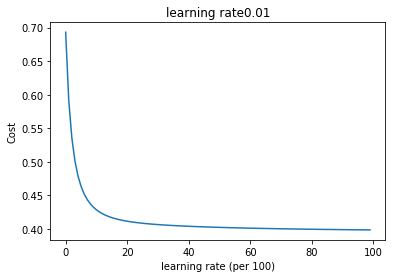

In [35]:
result = model(X_train, y_train, X_eval, y_eval, num_iterations = 10000, learning_rate = 0.01, lambd = 0, print_cost = True)

cost = np.squeeze(result['costs'])
plt.plot(cost)
plt.ylabel('Cost')
plt.xlabel('learning rate (per 100)')
plt.title('learning rate' + str(result['learning_rate']))
plt.show()

## 6. Evaluation Report
Evalution consitis of two steps

1. Evalute the trained model on evaluation test
2. Evalute the model using differnt learning rates

### 6.1 Evaluation Report

In [36]:
print("Evaluation Report:")
print(classification_report(y_eval.T, result['Y_prediction_test'].T)) # most sklearn functions expacts input in the shape(no. of examples, no.of features)

Evaluation Report:
             precision    recall  f1-score   support

          0       0.84      0.94      0.88      5680
          1       0.70      0.44      0.54      1861

avg / total       0.80      0.82      0.80      7541



### 6.2 Evaluate the best Model based on Learning Rate

Learning Rate is: 0.01
Train Accuracy 81.65421510985368 %
Test Accuracy 81.40830128630155 %

-------------------------------------------------------

Learning Rate is: 0.001
Train Accuracy 80.92922505636355 %
Test Accuracy 80.71873756796181 %

-------------------------------------------------------

Learning Rate is: 0.0001
Train Accuracy 80.41200654259316 %
Test Accuracy 79.63134862750299 %

-------------------------------------------------------



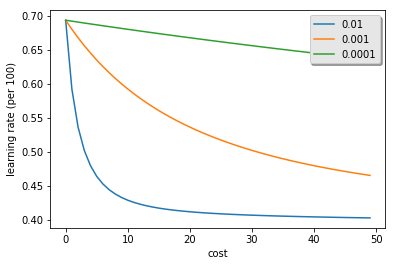

In [19]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("Learning Rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_eval, y_eval, num_iterations = 5000, lambd = 0, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']), label = str(models[str(i)]['learning_rate']))
    
plt.xlabel('cost')
plt.ylabel('learning rate (per 100)')

legend = plt.legend(loc = 'upper right', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 7 Predict on Test data

Predicting on test data is important but we donot evalute more than one model on this data. We evaluate the final model on this data. So we do the following steps for final prediction

1. Import the test data
2. preprocess the data like we do on train data
3. predict and evaluate on Metric
4. Get the true label for predictions

### 7.1  Importing Test data

In [43]:
census_test = pd.read_csv("adult.test.csv")
census_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### 7.2 Cleaning Test data

In [50]:
clean_census_test = clean_data(census_test) # remove unknow values
feature_map = map_string_features(clean_census_test) # getting feature map dict
sen = clean_census_test.replace(feature_map)  # converting data to numeric value based on feature_map dict

output = sen['income'] # get the oputput feature column
Y_test = np.reshape(output.values, (-1, 1)) # creating output label numpy array of shape (no.of examples, 1)

sen = sen.drop(['income'], axis = 1) # remove the output column from the data

X_test = ((sen - mean_data)/std_data)


X_test = X_test.T
Y_test = Y_test.T
print("Test Data shape: " + str(X_test.shape))
print("Test Labels shape: " + str(Y_test.shape))

Test Data shape: (14, 15060)
Test Labels shape: (1, 15060)


### 7.3 Prediction and Evaluation

In [52]:
w = result['w']
b = result['b']
Y_prediction = predict(w, b, X_test) # making predictions
print("Test Accuracy {} %".format(100 - np.mean(np.abs(Y_prediction - Y_test)) * 100 ))
print(classification_report(Y_test.T, Y_prediction.T, target_names = list(feature_map['income'].keys())))

Test Accuracy 80.93625498007968 %
             precision    recall  f1-score   support

     <=50K.       0.82      0.96      0.88     11360
      >50K.       0.75      0.34      0.47      3700

avg / total       0.80      0.81      0.78     15060



### 7.4 Get True Label for pridiction

In [53]:
def predictions_to_string(Y_pred, feat_map):
    y = Y_pred.astype(int)
    mapping = list(feat_map['income'].keys())
    real_value = []
    for n in y[0]:
        real_value.append(mapping[n])
    return real_value

In [54]:
true_predicted_label = predictions_to_string(Y_prediction, feature_map)

## Note

As the test data is skewed and there is only 25% examples that has income >50K. so this class has low recall